In [9]:
import pandas as pd

In [10]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\ML and DL\prototype\dataset\flood_risk_dataset_india.csv')

In [11]:
df.shape

(10000, 14)

In [12]:
df

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,0,1


# Outlier Detection

In [13]:
upper_lim=df['Temperature (°C)'].mean() + 3 * df['Temperature (°C)'].std()
lower_lim=df['Temperature (°C)'].mean() - 3 * df['Temperature (°C)'].std()

In [14]:
z=(df['Temperature (°C)']-df['Temperature (°C)'].mean())/df['Temperature (°C)'].std()

In [15]:
z

0       0.482470
1      -0.136407
2       1.611743
3      -0.967959
4       0.308459
          ...   
9995    0.883479
9996    0.919787
9997   -0.792900
9998   -0.222819
9999   -0.039065
Name: Temperature (°C), Length: 10000, dtype: float64

In [16]:
lower_lim

np.float64(3.951888322921885)

In [17]:
(df['Temperature (°C)']<lower_lim).value_counts()

Temperature (°C)
False    10000
Name: count, dtype: int64

In [18]:
(df['Temperature (°C)']<lower_lim).value_counts()

Temperature (°C)
False    10000
Name: count, dtype: int64

In [19]:
df[(df['Temperature (°C)']<lower_lim) & (df['Temperature (°C)']>upper_lim)]

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred


# One Hot Encoding

In [20]:
def get_unique(df_):
    cols=df_.columns 
    unique_value_of_cols=[]
    for col in cols:
        # print(col)
        if df_[col].dtype=='O':
            unique_value_of_cols.append({col:df_[col].unique()})
            print()
            # break
    return unique_value_of_cols

In [21]:
values=get_unique(df)

In [22]:
values

[{'Land Cover': array(['Water Body', 'Forest', 'Agricultural', 'Desert', 'Urban'],
        dtype=object)},
 {'Soil Type': array(['Clay', 'Peat', 'Loam', 'Sandy', 'Silt'], dtype=object)}]

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder=LabelEncoder()
df["Land Cover"]=label_encoder.fit_transform(df["Land Cover"])
df["Soil Type"]=label_encoder.fit_transform(df["Soil Type"])


In [25]:
df["Soil Type"]

0       0
1       2
2       1
3       3
4       1
       ..
9995    0
9996    0
9997    0
9998    3
9999    0
Name: Soil Type, Length: 10000, dtype: int64

# Feature Selection

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
correlation_matrix=df.corr()

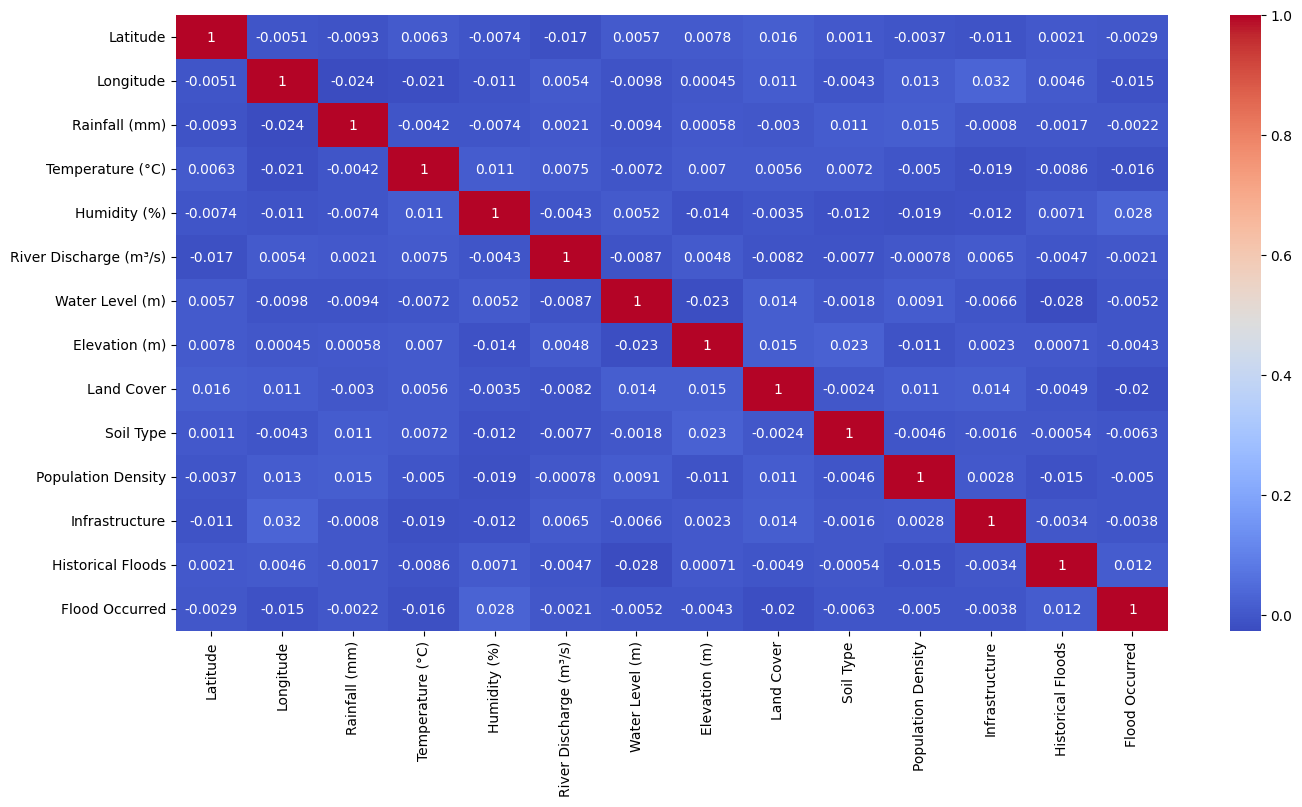

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

# X and Y

In [29]:
df.columns

Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density',
       'Infrastructure', 'Historical Floods', 'Flood Occurred'],
      dtype='object')

In [30]:
x=df.drop(['Latitude','Longitude','Population Density','Infrastructure','Flood Occurred','Historical Floods'],axis=1)

In [31]:
x

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type
0,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,4,0
1,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,2
2,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,0,1
3,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,3
4,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,0,1
...,...,...,...,...,...,...,...,...
9995,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,0,0
9996,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,0
9997,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,0
9998,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,4,3


In [32]:
y=df['Flood Occurred']

# Train and Test data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Scaling

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))

In [ ]:
X_train_scaled

,0,1,2,3,4,5,6,7
0,-0.302338,-0.768682,1.258055,-1.137526,-0.631937,-1.193793,-0.001147,0.695175
1,-0.655250,1.081614,0.430536,-1.538615,1.629828,0.658523,-1.412585,-0.720300
2,-1.577901,-0.391697,-0.988834,0.249655,0.681966,-0.313662,-1.412585,-0.012562
3,0.221794,-1.298900,-0.879542,-1.650964,-0.959014,1.104478,1.410292,1.402913
4,0.574021,-1.363872,-0.956896,0.239600,0.399619,0.400483,-0.001147,-1.428038
...,...,...,...,...,...,...,...,...
7995,0.453645,-0.143044,-1.491441,-0.020931,1.339793,0.977241,0.704572,1.402913
7996,1.134797,-1.680785,1.609548,0.938069,1.147562,0.613240,1.410292,-0.720300
7997,-0.683200,-1.067793,-0.910396,-0.840997,-0.122997,0.888357,0.704572,-1.428038
7998,0.786542,0.451390,-0.193388,-0.547540,-0.128253,0.266397,1.410292,-0.012562


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))

In [38]:
X_train_scaled

,0,1,2,3,4,5,6,7
0,-0.302338,-0.768682,1.258055,-1.137526,-0.631937,-1.193793,-0.001147,0.695175
1,-0.655250,1.081614,0.430536,-1.538615,1.629828,0.658523,-1.412585,-0.720300
2,-1.577901,-0.391697,-0.988834,0.249655,0.681966,-0.313662,-1.412585,-0.012562
3,0.221794,-1.298900,-0.879542,-1.650964,-0.959014,1.104478,1.410292,1.402913
4,0.574021,-1.363872,-0.956896,0.239600,0.399619,0.400483,-0.001147,-1.428038
...,...,...,...,...,...,...,...,...
7995,0.453645,-0.143044,-1.491441,-0.020931,1.339793,0.977241,0.704572,1.402913
7996,1.134797,-1.680785,1.609548,0.938069,1.147562,0.613240,1.410292,-0.720300
7997,-0.683200,-1.067793,-0.910396,-0.840997,-0.122997,0.888357,0.704572,-1.428038
7998,0.786542,0.451390,-0.193388,-0.547540,-0.128253,0.266397,1.410292,-0.012562


# Model Selection

In [44]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [41]:
model_parms={
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },

    'RFC':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10,20],
            
        }
    },

    'Log reg':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10],
        }
    },

    'Des Tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterio':['gini','entropy','log_loss']
        }
    }

}

In [42]:
score=[]

In [45]:

clf=GridSearchCV(
RandomForestClassifier(),
{
'n_estimators':[1,5,10,20],

},
cv=5,return_train_score=False
)
clf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10, 20]})

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035277,0.014972,0.005647,0.005543,1,{'n_estimators': 1},0.496875,0.510625,0.491875,0.501875,0.490625,0.498375,0.007306,3
1,0.190766,0.014697,0.003945,0.003293,5,{'n_estimators': 5},0.472500,0.491250,0.491875,0.505000,0.508750,0.493875,0.012750,4
2,0.307291,0.092469,0.010073,0.006563,10,{'n_estimators': 10},0.508125,0.503750,0.490625,0.501875,0.519375,0.504750,0.009317,1
3,0.445765,0.060757,0.005799,0.006244,20,{'n_estimators': 20},0.486875,0.504375,0.495625,0.498750,0.513750,0.499875,0.008956,2


In [ ]:
clf.best_score_

np.float64(0.50475)

In [46]:
clf.best_params_

{'n_estimators': 20}

In [49]:
ml_model=RandomForestClassifier(n_estimators=20)
ml_model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=20)

In [50]:
ml_model.score(X_test_scaled,y_test)

0.4845

In [51]:
X_train_scaled.loc[0,:]

0   -0.302338
1   -0.768682
2    1.258055
3   -1.137526
4   -0.631937
5   -1.193793
6   -0.001147
7    0.695175
Name: 0, dtype: float64

In [52]:
X_train_scaled

,0,1,2,3,4,5,6,7
0,-0.302338,-0.768682,1.258055,-1.137526,-0.631937,-1.193793,-0.001147,0.695175
1,-0.655250,1.081614,0.430536,-1.538615,1.629828,0.658523,-1.412585,-0.720300
2,-1.577901,-0.391697,-0.988834,0.249655,0.681966,-0.313662,-1.412585,-0.012562
3,0.221794,-1.298900,-0.879542,-1.650964,-0.959014,1.104478,1.410292,1.402913
4,0.574021,-1.363872,-0.956896,0.239600,0.399619,0.400483,-0.001147,-1.428038
...,...,...,...,...,...,...,...,...
7995,0.453645,-0.143044,-1.491441,-0.020931,1.339793,0.977241,0.704572,1.402913
7996,1.134797,-1.680785,1.609548,0.938069,1.147562,0.613240,1.410292,-0.720300
7997,-0.683200,-1.067793,-0.910396,-0.840997,-0.122997,0.888357,0.704572,-1.428038
7998,0.786542,0.451390,-0.193388,-0.547540,-0.128253,0.266397,1.410292,-0.012562


In [53]:
ml_model.predict([[-0.302338,-0.768682,1.258055,	-1.137526,	-0.631937,	-1.193793,	-0.001147,	0.695175]])

array([1])

In [54]:
ml_model_yp=ml_model.predict(X_test_scaled)

# ANN

In [55]:
import tensorflow as tf
from tensorflow import keras


In [56]:
X_train_scaled.shape

(8000, 8)

In [57]:
model=keras.Sequential([
    keras.layers.Dense(8,input_shape=(8,),activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

c:\Users\ADMIN\Desktop\ML and DL\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5069 - loss: 0.7196
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5062 - loss: 0.6969
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5102 - loss: 0.6944
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5128 - loss: 0.6933
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5090 - loss: 0.6925
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5140 - loss: 0.6926
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5146 - loss: 0.6923
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5256 - loss: 0.6912
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5235 - loss: 0.6910
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5280 - loss: 0.6915
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5313 - loss: 0.6907
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test_scaled,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5035 - loss: 0.6995


[0.7024691700935364, 0.5040000081062317]

In [ ]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.5067906 ],
       [0.5067906 ],
       [0.49578452],
       ...,
       [0.5271365 ],
       [0.46205977],
       [0.5067906 ]], dtype=float32)

In [ ]:
y_predictd=[]
for i in model.predict(X_test_scaled):
    if i[0]>0.5:
        y_predictd.append(1)
    else:
        y_predictd.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_predictd

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,


In [47]:
def model_predicting_scaling(values):
    scaler=StandardScaler()
    yp=model.predict(scaler.fit_transform(values))
    if yp>0.5:
        return 1
    return 0

In [48]:
print(model_predicting_scaling([x.loc[4].values]))

NameError: name 'model' is not defined

In [ ]:
df.loc[4].values

array([1.25245406e+01, 8.18221007e+01, 1.44626803e+02, 3.26356925e+01,
       3.62922667e+01, 2.09339068e+03, 3.18846574e+00, 2.00181822e+03,
       0.00000000e+00, 1.00000000e+00, 6.16796459e+03, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

# Report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,y_predictd))

              precision    recall  f1-score   support

           0       0.50      0.25      0.34       990
           1       0.51      0.75      0.60      1010

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.50      0.50      0.47      2000



In [ ]:
print(classification_report(y_test,ml_model_yp))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       990
           1       0.49      0.45      0.47      1010

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



In [ ]:
import pickle

In [ ]:
with open('fp_ann.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
with open('fp_ml_rf.pickle','wb') as f:
    pickle.dump(ml_model,f)

In [ ]:
import json

In [ ]:
columns={
    'data_columns':[col.lower() for col in X_train.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))

In [ ]:
[col.lower() for col in X_train.columns]

['rainfall (mm)',
 'temperature (°c)',
 'humidity (%)',
 'river discharge (m³/s)',
 'water level (m)',
 'elevation (m)',
 'land cover',
 'soil type']

In [ ]:
df.loc[0].values

array([1.88616634e+01, 7.88355837e+01, 2.18999493e+02, 3.41443371e+01,
       4.39129633e+01, 4.23618289e+03, 7.41555203e+00, 3.77465433e+02,
       4.00000000e+00, 0.00000000e+00, 7.27674218e+03, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

In [ ]:
x.loc[0].values

array([2.18999493e+02, 3.41443371e+01, 4.39129633e+01, 4.23618289e+03,
       7.41555203e+00, 3.77465433e+02, 4.00000000e+00, 0.00000000e+00])

# Oversampling

In [58]:
df_0=df[df['Flood Occurred']==0]
df_1=df[df['Flood Occurred']==1]

In [61]:
count_0=len(df_0)
count_1=len(df_1)

In [63]:
count_1

5057

In [64]:
df_0_over=df_0.sample(count_1,replace=True)

In [65]:
df_test=pd.concat([df_0_over,df_1],axis=0)

In [67]:
df_test['Flood Occurred'].value_counts()

Flood Occurred
0    5057
1    5057
Name: count, dtype: int64

In [68]:
df_test

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
6405,33.769379,93.982100,266.395590,42.185707,44.546794,2189.095045,7.433770,6437.550660,0,0,2106.501569,1,0,0
2889,32.238952,90.725060,212.568471,26.808861,46.054627,1418.898811,0.977029,5139.781470,2,2,604.123337,1,1,0
9533,32.496566,93.362806,193.026320,18.525933,70.221071,4020.539039,7.648635,4437.439883,1,0,4716.837915,0,0,0
415,21.004920,91.944472,62.485676,18.995414,82.501900,2004.581121,3.471736,5252.019225,1,0,1049.371187,1,0,0
7880,9.567381,76.445651,67.861730,27.432349,49.813709,1269.606081,2.257738,1958.119954,2,1,3512.377033,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,33.241613,77.847532,46.377270,15.442249,66.989836,3167.019475,2.226044,2422.112390,1,0,1140.103224,1,0,1
9992,21.662200,70.595955,47.477868,31.774465,64.771080,1504.834080,1.413081,7977.882655,1,4,5274.123180,1,1,1
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,0,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,4,3,906.031452,1,0,1


In [69]:
x_=df_test.drop(['Latitude','Longitude','Population Density','Infrastructure','Flood Occurred','Historical Floods'],axis=1)

In [71]:
y_=df_test['Flood Occurred']

In [73]:
X_t,X_te,y_t,y_te=train_test_split(x_,y_,test_size=0.2,random_state=10,stratify=y_)

In [77]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_t_scaled=pd.DataFrame(scaler.fit_transform(X_t))
X_te_scaled=pd.DataFrame(scaler.fit_transform(X_te))
X_te_scaled

,0,1,2,3,4,5,6,7
0,1.382580,1.399803,-0.633051,-0.226970,0.873277,0.820252,-1.426361,-1.433864
1,1.547448,0.976902,-1.075299,1.512669,-0.899191,0.264180,0.681916,-0.008105
2,1.623589,0.157600,-0.401895,-0.222126,-0.833903,0.137907,-0.020843,-0.008105
3,-1.214083,-0.299689,-1.234374,1.052144,0.288235,0.319515,1.384674,-1.433864
4,-0.273595,1.063605,0.494191,0.431676,-0.592018,1.388841,1.384674,-0.720984
...,...,...,...,...,...,...,...,...
2018,-0.906128,-0.843617,0.560542,-1.131036,-0.939311,0.683664,-0.723602,1.417654
2019,1.102421,1.208067,-0.830448,0.710369,-1.698420,-1.646351,-0.723602,1.417654
2020,0.020665,0.204345,0.492346,-1.133458,-1.573704,-1.476695,-0.020843,-0.720984
2021,-1.367840,1.316552,-1.260201,-0.391753,-1.322189,0.204920,-0.020843,1.417654


In [78]:
ml_model=RandomForestClassifier()
ml_model.fit(X_t_scaled,y_t)

RandomForestClassifier()

In [80]:
ml_model.score(X_te_scaled,y_te)

0.7024221453287197